In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *
from sparse_rf.util.fns import *

In [2]:
m = 1000
d = 100
q = 3
active = fourier

ratio_train = 0.7

def make_D(W):
    norm = np.linalg.norm(W, axis=1)**2
    weight = np.concatenate((norm, norm), axis=-1)
    D = np.diag(1.0/weight**4)
    return D

In [3]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [4]:
y = np.array(list(map(fn3, X)))
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [5]:
Ns = np.arange(1, 10201, 200)

In [6]:
%%time
results_dense_l2 = []
for N in Ns:
    res = []
    for _ in range(3):
        W = make_W(d, d, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        c = min_l2(A_train, y_train)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_dense_l2.append(res)

CPU times: user 30min, sys: 27.4 s, total: 30min 27s
Wall time: 5min 12s


In [7]:
%%time
results_sparse_l2 = []
for N in Ns:
    res = []
    for _ in range(3):
        W = make_W(d, q=1, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        c = min_l2(A_train, y_train)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_sparse_l2.append(res)

CPU times: user 30min 29s, sys: 25 s, total: 30min 54s
Wall time: 5min 12s


In [8]:
%%time
results_dense_wl2 = []
for N in Ns:
    res = []
    for _ in range(3):
        W = make_W(d, d, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        D = make_D(W)
        c = min_wl2(A_train, y_train, D)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_dense_wl2.append(res)

CPU times: user 1h 17min 43s, sys: 1min 22s, total: 1h 19min 5s
Wall time: 14min 5s


In [9]:
%%time
results_sparse_wl2 = []
for N in Ns:
    res = []
    for _ in range(3):
        W = make_W(d, q, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        D = make_D(W)
        c = min_wl2(A_train, y_train, D)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_sparse_wl2.append(res)

CPU times: user 1h 15min 39s, sys: 1min 21s, total: 1h 17min 1s
Wall time: 13min 37s


[0.05537976412533197, 0.07718351741298092, 0.15451027538368903, 0.08025920693947498, 0.07352134629323764, 0.06732354188908975, 0.0655577236722033, 0.06339339500915214, 0.06227057996608279, 0.061265647091901694, 0.05981950897611734, 0.059567325352890006, 0.059629344602533337, 0.05749594126622041, 0.05994648808164533, 0.05944556490165646, 0.05803916078107919, 0.05814448529953988, 0.057983776247530816, 0.056722505535821276, 0.058075710173221017, 0.0569662968025165, 0.05747378404038369, 0.05773314535122697, 0.0571635040705, 0.05668672611914011, 0.05691737317436821, 0.057354326083635, 0.05660342181385682, 0.056472940411130435, 0.05641608945069291, 0.056845695030421355, 0.05631722018294602, 0.057187653471412116, 0.0566412513183323, 0.05587972490796369, 0.056910486645873753, 0.05646666339117006, 0.05659397365854497, 0.05681997972049881, 0.05659622708155947, 0.05692572190518727, 0.056420919681755305, 0.05662312834949825, 0.056901456420836466, 0.0565220847732906, 0.05647035150823091, 0.05680696

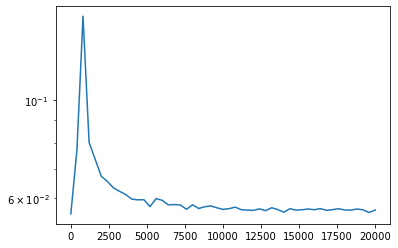

In [10]:
print([np.mean(res) for res in results_dense_l2])
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_l2])

[0.024885495522641705, 0.011309064121041143, 0.06638473861844964, 0.06456395445516015, 0.04547031429740148, 0.04606768058730612, 0.04853598143054267, 0.04580058175041462, 0.042162671156596665, 0.04666768691418277, 0.04897936229943278, 0.03979828839645241, 0.04171973576840612, 0.04558230590059578, 0.04298854162860736, 0.04689075352998565, 0.045694126118701765, 0.04173974587257703, 0.03976241521439107, 0.039164722851950357, 0.03949184284752962, 0.03949927840604743, 0.03787551556946455, 0.04295150195472266, 0.04032810496042972, 0.04489301398651304, 0.03996191685153124, 0.04073295027057137, 0.036875220258573746, 0.03836886638641281, 0.03990209671740511, 0.04200868837495083, 0.03967609509189949, 0.043057723362146534, 0.043484236071801796, 0.04029872860724581, 0.03966919027455875, 0.04238625048475792, 0.04043009070604483, 0.04388617619300598, 0.04304562425487283, 0.03706722609002588, 0.038261429018019044, 0.038597455559286724, 0.03752361584381233, 0.03761128484292662, 0.04140059365116247, 0.

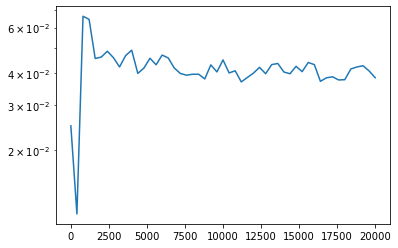

In [11]:
print([np.mean(res) for res in results_sparse_l2])
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_l2])

[0.05551459724665988, 0.08251150149121834, 0.15848020345307795, 0.09549777196772274, 0.08168320683596032, 0.07350425108508225, 0.07303933609572107, 0.06910734920159305, 0.06631736577712198, 0.06583379542068743, 0.0648763231942102, 0.06436696132460158, 0.06465515474654318, 0.0629369244605207, 0.06214090690554138, 0.06330855222991988, 0.06189082288934452, 0.060320305138950536, 0.06244308423963931, 0.059803144531190656, 0.06107869602604305, 0.05913701419468739, 0.059859454230823984, 0.059862388067851734, 0.060381382999942106, 0.06031835041409891, 0.06113535304046228, 0.0594548837023701, 0.05963257041416572, 0.05996818809038532, 0.058500243936412344, 0.06011264882648034, 0.058370842955901274, 0.05946205609642566, 0.059748738251873705, 0.05873841767171913, 0.05893105474311108, 0.058613821882877525, 0.05883030114479623, 0.05785542674500377, 0.05951010621220323, 0.057968757392195126, 0.058694070793691176, 0.05881328526719965, 0.05695200384328505, 0.058659229673927595, 0.058361372323024, 0.057

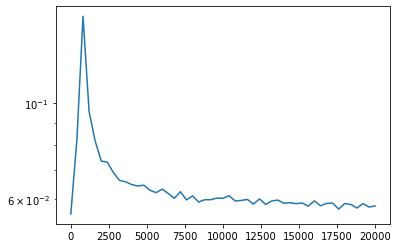

In [12]:
print([np.mean(res) for res in results_dense_wl2])
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_wl2])

[0.025671324829469266, 0.03230318047078474, 0.06554589876928699, 0.041545567772932626, 0.0325248154382303, 0.03625514691053037, 0.0324243673163313, 0.03477181034486198, 0.03294714850061505, 0.02981248235547324, 0.030749759989799303, 0.030419626607776307, 0.0323602352782963, 0.02669323503707609, 0.03080753291308141, 0.03477261294191087, 0.029837977066173433, 0.028859883958060346, 0.028156302220925522, 0.028424509435910378, 0.026711205679193665, 0.02786516546951855, 0.027114314218372126, 0.03119467846247988, 0.026000637598935384, 0.02915868004540445, 0.027770245778241776, 0.02913441897831363, 0.027624259360922415, 0.026989861884306427, 0.029755265457790395, 0.02948457850401635, 0.031431888399405784, 0.029881567415849592, 0.029891792358927943, 0.029223512615931906, 0.028328005331486328, 0.030771471988011317, 0.028672481557607283, 0.028783062794221593, 0.032395845630047826, 0.029152727751552806, 0.027236700300678828, 0.028289222113220335, 0.028947114296062625, 0.026298114386517454, 0.02683

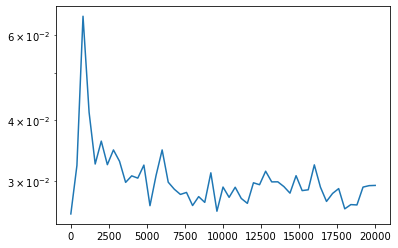

In [13]:
print([np.mean(res) for res in results_sparse_wl2])
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_wl2])

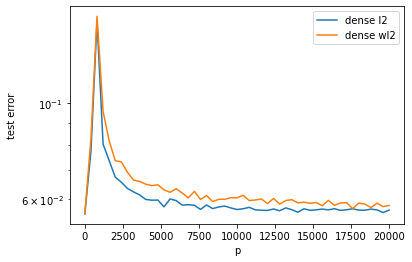

In [14]:
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_l2], label="dense l2")
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_wl2], label="dense wl2")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()

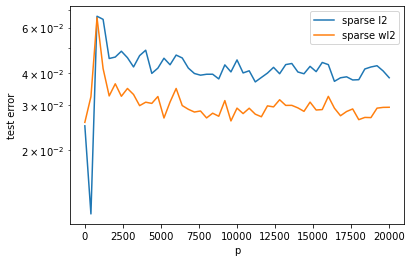

In [15]:
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_l2], label="sparse l2")
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_wl2], label="sparse wl2")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()

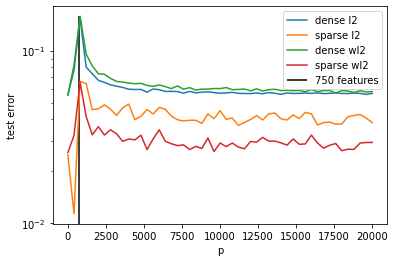

In [16]:
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_l2], label="dense l2")
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_l2], label="sparse l2")
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_wl2], label="dense wl2")
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_wl2], label="sparse wl2")
plt.vlines(750, ymin=0, ymax=max([np.mean(res) for res in results_dense_wl2]), color="black", label="750 features")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.savefig("fn3_q3.png")